# Project Submission

This notebook will be your project submission. All tasks will be listed in the order of the Courses that they appear in. The tasks will be the same as in the Capstone Example Notebook, but in this submission you ___MUST___ use another dataset. Failure to do so will result in a large penalty to your grade in this course.

## Finding your dataset

Take some time to find an interesting dataset! There is a reading discussing various places where datasets can be found, but if you are able to process it, go ahead and use it! Do note, for some tasks in this project, each entry will need 3+ attributes, so keep that in mind when finding datasets. After you have found your dataset, the tasks will continue as in the Example Notebook. You will be graded based on the tasks and your results. Best of luck!

### As Reviewer: 
Your job will be to verify the calculations made at each "TODO" labeled throughout the notebook.

### First Step: Imports

In the next cell we will give you all of the imports you should need to do your project. Feel free to add more if you would like, but these should be sufficient.

In [1]:
import gzip
from collections import defaultdict
import random
import numpy as np
import scipy.optimize
import string
from sklearn import linear_model
from nltk.stem.porter import PorterStemmer # Stemming
import pandas as pd


# Task 1: Data Processing

### TODO 1: Read the data and Fill your dataset

In [ ]:
# read the data to a pandas dataframe
#df = pd.read_csv ("C:/Users/45517/Desktop/Capstone_project/Data/amazon_reviews_us_Home_Improvement_v1_00.tsv", sep="\t", encoding = "utf-8", names=('marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date'))

The dataset comes from the original source - I could not find the cleaned version mentioned in the course material. 
So a bit of preliminary cleaning is necessary: 
- 1.1 remove rows with missing values
- 1.2 remove row 1 - header duplication
- 1.3 convert to int: star_rating, helpful_votes, total_votes
- 1.4 convert to bool: vine, verified_purchase
- 1.5 convert to datetime: review_date
- 1.6 check consistency and quality of key columns

# 1.1 remove rows with missing values
missing_values_count = df.isnull().sum()
missing_values_count

#count of the number of rows removed - not too bad. 
df1 = df.dropna()
(len(df), len(df1), len(df)-len(df1))

# 1.2 remove row 1 - header duplication
df1.head(2)

df2 = df1.drop(0, axis = 0)
df2.head(2)

#we should reset index as we have deleted rows in 1.1 and 1.2
df3 = df2.reset_index()

# 1.3 convert to int: star_rating, helpful_votes, total_votes
# we start with letting pandas find the best typefit
df3 = df3.convert_dtypes()
df3.dtypes

df3["star_rating"] = pd.to_numeric(df3["star_rating"], downcast="signed")
df3["helpful_votes"] = pd.to_numeric(df3["helpful_votes"], downcast="signed")
df3["total_votes"] = pd.to_numeric(df3["total_votes"], downcast="signed")

# 1.4 convert to bool: vine, verified_purchase
d = {'Y': True, 'N': False}
df3["vine"].map(d)
df3["verified_purchase"].map(d)

# 1.5 convert to datetime: review_date
#looks like some of the dates are non-valid
date_lengths = df3.review_date.str.len()
date_lengths.value_counts()

indices = np.where([date_lengths == 1])[1]
indices = indices
print('Indices with corrupted data:', indices)
df3.loc[indices]

df4 = df3.drop(indices, axis = 0)
date_lengths = df4.review_date.str.len()
date_lengths.value_counts()

#change timestamp to datetime type
df4["review_date"] = pd.to_datetime(df4["review_date"], format="%Y-%M-%d")

#Convert to show date only
df4["review_date"] = df4["review_date"].dt.date

#change timestamp to datetime type
df4["review_date"] = pd.to_datetime(df4["review_date"])

#create column with month and year stamp
df4['month_year'] = df4["review_date"].dt.to_period('M')

# 1.6 check the first rows in the dataset to see that things look fine
df4.head()

### TODO 2: Split the data into a Training and Testing set

First shuffle your data, then split your data. Have Training be the first 80%, and testing be the remaining 20%. 

#shuffle the dataset in the dataframe format
df4 = df4.sample(frac = 1)

#Split the dataset
N = len(df4)
T = round(N*0.8)
#V = round(N*0.2)
TE = round(N*0.2)
full_tr = df4[:T]
#X_validation = X[T:T+V]
full_test = df4[T:N]
#y_train = y[:T]
#y_validation = y[T:T+V]
#y_test = y[T+V:N]

#Check the split
(len(df4), len(full_tr), len(full_test))

In [ ]:
#save the testset and the trainingset
#full_tr.to_csv("C:/Users/45517/Desktop/Capstone_project/Data/full_train.csv", index=False)
#full_test.to_csv("C:/Users/45517/Desktop/Capstone_project/Data/full_test.csv", index = False)

#### Now delete your dataset
You don't want any of your answers to come from your original dataset any longer, but rather your Training Set, this will help you to not make any mistakes later on, especialy when referencing the checkpoint solutions.

In [2]:
# IMPORTANT! READ!
# Not sure why delete the full dataset. I will disable everything until this step once executed - via markdown mode. 
# So the training and test set are shuffled and saved once - and from here we read and use the training set. 

In [3]:
#load the trainingset
ft = pd.read_csv ("C:/Users/45517/Desktop/Capstone_project/Data/full_train.csv", sep=",", encoding = "utf-8")

In [4]:
ft.head(3)

,index,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,month_year
0,1073134,US,30601198,R1L9PM379H1VH5,B0000CBIFD,389336482,Frost King R338H Sponge Rubber Foam Tape 3/16-...,Home Improvement,5,0,0,N,Y,Five Stars,works as intended,2014-01-12,2014-01
1,1917516,US,17463604,R346HYHY50CXOJ,B004EMNIQ8,623424728,Intertape Polymer Group 6555SL AC6 6mil Utili...,Home Improvement,3,0,0,N,Y,Not the stickiest duct tape,This is not the stickiest duct tape out there ...,2013-01-01,2013-01
2,272957,US,13669558,R247HKWHM64AX5,B00DPVLTP6,214607005,Factop Light Strip Waterproof 5M IC6803 5050 D...,Home Improvement,1,0,0,N,Y,They are about as waterproof as your shoes wou...,These are NOT WATERPROOF. They are about as w...,2015-01-22,2015-01


In [5]:
ft["review_date"] = pd.to_datetime(ft["review_date"])
ft['month_year'] = ft["review_date"].dt.to_period('M')

In [6]:
ft.dtypes

index                         int64
marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
month_year                period[M]
dtype: object

### TODO 3: Extracting Basic Statistics

Next you need to answer some questions through any means (i.e. write a function or just find the answer) all based on the __Training Set:__
1. How many entries are in your dataset?
2. Pick a non-trivial attribute (i.e. verified purchases in example), what percentage of your data has this attribute?
3. Pick another different non-trivial attribute, what percentage of your data share both attributes?

In [7]:
# 3.1 Number of entries in the full training set
total_cells = np.product(ft.shape)
total_rows = len(ft)
total_columns = ft.shape
(total_cells, total_rows, total_columns, total_cells/total_rows)

(35762866, 2103698, (2103698, 17), 17.0)

In [8]:
# 3.2 Pick a non-trivial attribute (i.e. verified purchases in example), what percentage of your data has this attribute?
ft["verified_purchase"].value_counts()

Y    1884858
N     218840
Name: verified_purchase, dtype: int64

In [9]:
Y = (ft["verified_purchase"] == "Y").sum() 
N = (ft["verified_purchase"] == "N").sum() 
print ("Ys = " + str(Y) + ", Ns = " + str(N) + ", ratio of Ys = " + str(round(Y/(Y+N)*100, 2))+"%")

Ys = 1884858, Ns = 218840, ratio of Ys = 89.6%


In [10]:
# 3.3 Pick another different non-trivial attribute, what percentage of your data share both attributes?
# how many received a one star rating?
ones = (ft["star_rating"] == 1).sum() 
total = len(ft) 
print ("One star ratings = " + str(ones) + ", total ratings = " + str(total) + ", ratio of one star ratings = " + str(round(ones/total*100, 2))+"%")

One star ratings = 196683, total ratings = 2103698, ratio of one star ratings = 9.35%


In [11]:
#Of the verified purchases, how many received a one star rating?
verified_ones = ((ft["verified_purchase"] == "Y") & (ft["star_rating"] == 1)).sum()
print("verified one-star ratings = " + str(verified_ones) + ", ratio of total verified ratings = " + str(round(verified_ones/Y*100, 2)) + "%") 

verified one-star ratings = 154532, ratio of total verified ratings = 8.2%


In [12]:
# 3.4 How many unique users are there in the dataset?
unique_users = ft.customer_id.value_counts().count()
unique_users

1440129

In [13]:
#How many unique products are there in the dataset?
unique_products = ft.product_id.value_counts().count()
unique_products

310623

In [14]:
# 3.5 What is the average rating?
ft.star_rating.describe()

count    2.103698e+06
mean     4.181956e+00
std      1.303085e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: star_rating, dtype: float64

In [15]:
round(ft.star_rating.mean(), 3)

4.182

2103698

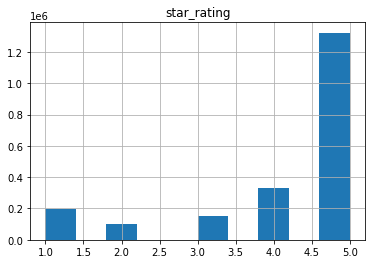

In [16]:
#histogram of key columns
ft.hist(column='star_rating')
len(ft)

8650

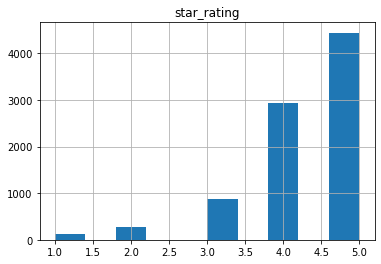

In [17]:
vine = ft[ft["vine"] == "Y"]
vine.hist(column = "star_rating")
len(vine)

# Task 2: Classification

Next you will use our knowledge of classification to extract features and make predictions based on them. Here you will be using a Logistic Regression Model, keep this in mind so you know where to get help from.

### TODO 1: Define the feature function

This implementation will be based on ___any two___ attributes from your dataset. You will be using these two attributes to predict a third. Hint: Remember the offset!

In [18]:
# Logistic regression is covered in week 4 of 'design thinking and predictive analytics form data products': 
# See 'Classification in Python'-video and 'Gradient descent in Python'-video
# Accuracy is covered in week 1 of 'meaningful predictive modeling' - 'classification diagnostics: accuracy and error'video
# Regularizer is covered in week 2 of 'meaningful predictive modelling' - Adding a Regularizer to our Model, and Evaluating the Regularized Model - video


In [19]:
# we will use 3 attributes (customer_id, review length, star rating) to predict verified_purchase
# If the model is of any value it should beat the Y/Total-ratio for verified_purchase, 
# or always predicting five stars, which is the most common star rating

In [20]:
def feature(d):
    feat = [1, len(d['review_body']), d["customer_id"], d["star_rating"]]
    return feat

### TODO 2: Fit your model

1. Create your __Feature Vector__ based on your feature function defined above. 
2. Create your __Label Vector__ based on the "verified purchase" column of your training set.
3. Define your model as a __Logistic Regression__ model.
4. Fit your model.

In [253]:
ft_sample = ft[:500000]

In [254]:
#the feature vector
X = np.array([feature(var) for var in ft_sample.iloc()])
type(X)

numpy.ndarray

In [255]:
#the label vector
y = np.array([var["verified_purchase"] for var in ft_sample.iloc()])
type(y)

numpy.ndarray

In [256]:
# the model defined and data fitted
model = linear_model.LogisticRegression()
model.fit(X, y)

C:\Users\45517\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### TODO 3: Compute Accuracy of Your Model

1. Make __Predictions__ based on your model.
2. Compute the __Accuracy__ of your model.

In [257]:
#load test set

In [258]:
#make predictions
predictions = model.predict(X)
predictions

array(['Y', 'Y', 'Y', ..., 'Y', 'Y', 'Y'], dtype='<U1')

In [259]:
#convert predicted output to pd.series and describe
predictionseries = pd.Series(predictions)
predictionseries.describe()

count     500000
unique         2
top            Y
freq      494112
dtype: object

In [261]:
#correctpredictions
correctpredictions = predictions == y
sum(correctpredictions)

448898

In [262]:
#Accuracy
accuracy = sum(correctpredictions)/len(correctpredictions)
accuracy

0.897796

In [263]:
#Default position - just assume "Y" all the time 
Y = (ft_sample["verified_purchase"] == "Y").sum() 
default = Y/len(correctpredictions)
default

0.896168

In [61]:
# follows that the model perform slightly better than the default position which is to predict 'y' every time. 
# Note that it is on the training set! 

#also note: the input to the model has to be arrays (np.array)!

# Task 3: Regression

In this section you will start by working though two examples of altering features to further differentiate. Then you will work through how to evaluate a Regularaized model.

In [348]:
ft_sample1 = ft.iloc[:500000]

In [349]:
ft_sample1.dtypes

index                         int64
marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
month_year                period[M]
dtype: object

### TODO 1: Unique Words in a Sample Set

We are going to work with a new dataset here, as such we are going to take a smaller portion of the set and call it a Sample Set. This is because stemming on the normal training set will take a very long time. (Feel free to change sampleSet -> reg_dataset if you would like to see the difference for yourself)

1. Count the number of unique words found within the 'review body' portion of the sample set defined below, making sure to __Ignore Punctuation and Capitalization__.
2. Count the number of unique words found within the 'review body' portion of the sample set defined below, this time with use of __Stemming,__ __Ignoring Puctuation,__ ___and___ __Capitalization__.

In [350]:
#step 3.2: Engineering the text column

# removes punctuation and upper case and creates a dict with count of all the words in the text column
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in ft_sample1.iloc():
    r = ''.join([c for c in d["review_body"].lower() if not c in punctuation]) # removes punctuation and upper case
    for w in r.split():
        wordCount[w] += 1 # creates a count of all the words in the text column

In [ ]:
# WITH STEMMER - add Stemmer to the engineering
wordCountStem = defaultdict(int)
punctuation = set(string.punctuation)
stemmer = PorterStemmer()
for d in ft_sample1.iloc():
    r = ''.join([c for c in d["review_body"].lower() if not c in punctuation]) # removes punctuation and upper case
    for w in r.split():
        w = stemmer.stem(w)
        wordCountStem[w] += 1 # creates a count of all the words in the text column

In [351]:
#FOR THE NON-STEMMED VERSION
#sort the list of words descending
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

# create a list of the 1000 most used words
words = [x[1] for x in counts[:500]]

# create a dict and set of the 100 most used words
wordID = dict(zip(words, range(len(words))))
wordSet = set(words)

In [ ]:
#FOR THE STEMMED VERSION
#sort the list of words descending
countsStem = [(wordCountStem[w], w) for w in wordCountStem]
countsStem.sort()
countsStem.reverse()

# create a list of the 1000 most used words
wordsStem = [x[1] for x in counts[:200]]

# create a dict and set of the 100 most used words
wordIDStem = dict(zip(wordsStem, range(len(wordsStem))))
wordSetStem = set(wordsStem)

### TODO 2: Evaluating Classifiers

1. Given the feature function and your counts vector, __Define__ your X_reg vector. (This being the X vector, simply labeled for the Regression model)
2. __Fit__ your model using a __Ridge Model__ with (alpha = 1.0, fit_intercept = True).
3. Using your model, __Make your Predictions__.
4. Find the __MSE__ between your predictions and your y_reg vector.

In [ ]:
#I will only run the non-stemmer model - due to compute constraints 

In [352]:
#the function needed to create a list for a particular review
def feature(datum):
    feat = [0]*len(words) # list of 1000 zeros
    r = ''.join([c for c in datum['review_body'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordID[w]] +=1
    feat.append(1) # add the offset dimension
    return feat

#the function that will evaluate the model
def accuracy(model, X, y):
    predictionsreg = model.predict(X)
    correctpredictionsreg = predictionsreg == y
    return sum(correctpredictionsreg)/len(correctpredictionsreg)

In [353]:
#saves the most accurate model
bestModel = None
bestaccuracy = None

In [354]:
#feature input - note it is a numpy.array
X_reg = np.array([feature(d) for d in ft_sample1.iloc()])

In [355]:
#change label column from Y/N to 1/0
def normer(var):
    d = var
    if d["verified_purchase"] == "Y":
        return 1
    else:
        return 0

ft_sample1['verified_purchase1'] = ft_sample1.apply(lambda row: normer(row), axis=1)

<ipython-input-355-978a8916121e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_sample1['verified_purchase1'] = ft_sample1.apply(lambda row: normer(row), axis=1)


In [356]:
#ft_sample1.head()

In [357]:
#Label column - also numpy array
y_reg = np.array([d["verified_purchase1"] for d in ft_sample1.iloc()])

In [358]:
#fits the model and calculates accuracy (note the it is RidgeClassifier that is used)
for lamb in (0.0001, 0.001, 0.01, 1):
    modelreg = linear_model.RidgeClassifier(alpha=lamb, fit_intercept = False)
    modelreg.fit(X_reg, y_reg)
    
    accuracyTrain = accuracy(modelreg, X_reg, y_reg)
    #mseValidation = MSE(model, X_validation, y_validation)

    print("lambda = " + str(lamb) + " , training/(validation) accuracy = " + str(accuracyTrain))# + "/" + str(mseValidation))
    if not bestModel or accuracyTrain < bestaccuracy:
        bestModel = model
        bestaccuracy = accuracyTrain

lambda = 0.0001 , training/(validation) accuracy = 0.897392
lambda = 0.001 , training/(validation) accuracy = 0.897392
lambda = 0.01 , training/(validation) accuracy = 0.897392
lambda = 1 , training/(validation) accuracy = 0.89739


In [359]:
#output of the best fit model
(len(X), len(words), bestModel, round(bestaccuracy, 5))

(500000, 500, Ridge(alpha=0.01, fit_intercept=False), 0.89739)

In [ ]:
# compare the accuracy of the models in task 2 and task 3. Almost same performance, but the Task 2 model is slightly better
#could be interesting to combine them

# Task 4: Recommendation Systems

For your final task, you will use your knowledge of simple similarity-based recommender systems to make calculate the most similar items.

The next cell contains some starter code that you will need for your tasks in this section.
Notice you should be back to using your __trainingSet__.

In [138]:
# Relevant videos: Deploying machine learning models: Week 1 - collaborative filtering-based recommendation video, 
# Week 2 - Implementing a similarity-based recommender, week 2 - Similarity based recommender for Rating prediction

In [ ]:
# we will use customer_id and product_parent as key columns. product_parent corresponds best to product_title. 

In [195]:
ft_sample4 = ft

In [196]:
#creates 2 default lists in the set format: 1 to contain sets of all products per customer and 1 to contain sets of all customers per product
customersperproduct = defaultdict(set)
productspercustomer = defaultdict(set)

In [197]:
# creates a dictionary of all to lookup product titles so that product parents make sense - we can compare whether a recommendation 
# seems to make sense (items that would be bought together)
itemNames = {}

### TODO 1: Fill your Dictionaries

1. For each entry in your training set, fill your default dictionaries (defined above). 

In [198]:
#now we populate the dictionaries
for d in ft_sample4.iloc:
    customer,product = d["customer_id"],d["product_parent"]
    customersperproduct[product].add(customer)
    productspercustomer[customer].add(product)
    itemNames[product] = d["product_title"]

In [199]:
#define the Jaccard similarity
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

#calculate and sort the similar item - candidateproducts loop speeds up the process by only looking at relevant product 
def mostSimilar(n, m): #n is the entry index, #m is the number of entries
    similarities = []  
    users = customersperproduct[n]
    candidateproducts = set()
    for u in users:
        candidateproducts = candidateproducts.union(productspercustomer[u])    
    for i2 in candidateproducts:
        if i2 == n: continue
        sim = Jaccard(users, customersperproduct[i2])
        similarities.append((sim,i2))
    similarities.sort(reverse=True)
    return similarities[:m]

### TODO 1: Fill your Dictionaries

1. Calculate the __10__ most similar entries to the __first__ entry in your dataset, using the functions defined above.

In [203]:
#example
#input
query = ft_sample4.loc[1]["product_parent"]
#output
mostSimilar(query, 10)

[(0.0425531914893617, 746424642),
 (0.03773584905660377, 459620076),
 (0.037037037037037035, 965101388),
 (0.037037037037037035, 925022928),
 (0.037037037037037035, 744593919),
 (0.037037037037037035, 663256728),
 (0.037037037037037035, 526186588),
 (0.037037037037037035, 373323101),
 (0.037037037037037035, 88680219),
 (0.037037037037037035, 67573513)]

In [204]:
itemNames[query]

'Intertape Polymer Group 6555SL AC6 6mil  Utility Grade Duct Tape, 1.88-Inch x 55-Yard, Silver, 3-Pack'

In [205]:
[itemNames[x[1]] for x in mostSimilar(query,10)]

['Brinks Home Security Push Pull Rotate Door Locks Alwood Entry Lever',
 '3-IN-ONE Oil No Rust Shield Rust & Corrosion Inhibitor (Pack of 12)',
 'BOSCH POWER TOOLS\xa0Replacement Part 2610967697\xa0Use Accessory',
 'BOSCH POWER TOOLS\xa0Replacement Part 373094\xa0Use Accessory',
 'BOSCH POWER TOOLS\xa0Replacement Part 318879\xa0Use Accessory',
 '6885 1.18-Inch by 100-Yard Ribbon, Yellow, 12-Pack',
 'Anchor 1/0-50 Cable Kitw/Ab-Lc40 M/F',
 'BOSCH POWER TOOLS\xa0Replacement Part 5048901\xa0Use Accessory',
 'Kenyon Express II B23200 13" Portable Butane Gas Cooker with Carrying Case',
 'BOSCH POWER TOOLS\xa0Replacement Part 318802\xa0Use Accessory']

## Finished!

Congratulations! You are now ready to submit your work. Once you have submitted make sure to get started on your peer reviews!